In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [3]:
#df = pd.read_excel('fifa_male.xlsx')
#xlsx = pd.ExcelFile('fifa_male.xlsx')
#df1 = pd.read_excel(xlsx, 'FIFA 22')
#df2 = pd.read_excel(xlsx, 'FIFA 21')
#df3 = pd.read_excel(xlsx, 'FIFA 20')
#df4 = pd.read_excel(xlsx, 'FIFA 19')
#df5 = pd.read_excel(xlsx, 'FIFA 18')
#df6 = pd.read_excel(xlsx, 'FIFA 17')
#df7 = pd.read_excel(xlsx, 'FIFA 16')
#df8 = pd.read_excel(xlsx, 'FIFA 15')

In [4]:
#df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])

In [5]:
import sys
 
# the system path
sys.path.append('/Users/Ray/codeup-data-science/fifa')
 
# importing the function
from acquire import get_fifa_data

In [6]:
df = get_fifa_data()
df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,year
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96.0,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92.0,93,93,93,92.0,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,2022
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88.0,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85.0,88,88,88,85.0,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,2022
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95.0,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88.0,89,89,89,88.0,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,htt

In [7]:
#catcols = [col for col in df.columns if df[col].dtype == 'O']
#catcols

In [8]:
#for col in catcols:
#   print(f"Column: {col}")
#   print(df[col].value_counts())
#    print("--------")
#    print(df[col].value_counts(normalize=True, dropna=False))
#    print("=================")

In [9]:
#numcols = [col for col in df.columns if df[col].dtype !='O']
#numcols

In [10]:
df.isnull()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [11]:
#def overview(df):
#    print('--- Shape: {}'.format(df.shape))
#    print('--- Info')
#    df.info()
#    print('--- Column Descriptions')
#    print(df.describe(include='all'))

#def nulls_by_columns(df):
#    num_missing = df.isnull().sum()
#    rows = df.shape[0]
#    pct_missing = num_missing/rows
#    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'pct_rows_missing': pct_missing})
#    cols_missing.set_index(df.columns)

#def nulls_by_rows(df):
#    num_missing = df.isnull().sum(axis=1)
#    rows = df.shape[1]
#    pct_missing = num_missing/rows
#    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'pct_cols_missing': pct_missing})
#    return df

In [12]:
#num_missing = df.isnull().sum()
#rows = df.shape[0]
#pct_missing = num_missing/rows
#cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'pct_rows_missing': pct_missing})
#cols_missing.set_index(df.columns)

In [13]:
#def nulls_by_col(df):
#    num_missing = df.isnull().sum()
#    rows = df.shape[0]
#    pct_missing = num_missing / rows
#    cols_missing = pd.DataFrame({'number_missing_rows': num_missing, 'percent_rows_missing': pct_missing})
#    return cols_missing

In [14]:
#nulls_by_column = nulls_by_col(df)
#nulls_by_column.sort_values(by="percent_rows_missing", ascending=False)

In [15]:
pd.DataFrame(df.isnull().sum(axis =1).value_counts()).reset_index()

,index,0
0,8,48795
1,7,30270
2,9,21507
3,10,14893
4,13,6868
5,6,4524
6,12,3161
7,15,2468
8,14,2266
9,3,2119


In [16]:
#df2 = pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index().groupby('num_cols_missing')\
#.count().reset_index().rename(columns = {'index': 'num_rows'})

#df2['pct_cols_missing'] = df2.num_cols_missing/df.shape[1]
#df2.head()

In [17]:
#def cols_missing(df):
#    df2 = pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index()\
#    .groupby('num_cols_missing').count().reset_index().\
#    rename(columns = {'index': 'num_rows' })
#    df2['pct_cols_missing'] = df2.num_cols_missing/df.shape[1]
#    return df2

In [18]:
# sort valyes by pc_col_missing
#cols_missing(df).sort_values(by = ['pct_cols_missing'], ascending = False)

In [19]:
#check data shape
df.shape

(142079, 111)

In [20]:
#def handle_missing_values(df, prop_required_column = .5, prop_required_row = .70):
#    threshold = int(round(prop_required_column*len(df.index),0))
#    df.dropna(axis=1, thresh=threshold, inplace=True)
#    threshold = int(round(prop_required_row*len(df.columns),0))
#   df.dropna(axis=0, thresh=threshold, inplace=True)
#    return df

In [21]:
# use the function defined above:

#df = handle_missing_values(df)

In [22]:
# check shape to see how many columns and rows were dropped

df.shape

(142079, 111)

In [23]:
# look at number of nulls for each column
df.isnull().sum()

sofifa_id                           0
player_url                          0
short_name                          0
long_name                           0
player_positions                    0
overall                             0
potential                           0
value_eur                        1897
wage_eur                         1622
age                                 0
dob                                 0
height_cm                           0
weight_kg                           0
club_team_id                     1630
club_name                        1630
league_name                      1630
league_level                     2015
club_position                    1630
club_jersey_number               1630
club_loaned_from               133774
club_joined                      9935
club_contract_valid_until        1630
nationality_id                      0
nationality_name                    0
nation_team_id                 133635
nation_position                133635
nation_jerse

In [24]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142079 entries, 0 to 142078
Data columns (total 111 columns):
 #    Column                       Non-Null Count   Dtype  
---   ------                       --------------   -----  
 0    sofifa_id                    142079 non-null  int64  
 1    player_url                   142079 non-null  object 
 2    short_name                   142079 non-null  object 
 3    long_name                    142079 non-null  object 
 4    player_positions             142079 non-null  object 
 5    overall                      142079 non-null  int64  
 6    potential                    142079 non-null  int64  
 7    value_eur                    140182 non-null  float64
 8    wage_eur                     140457 non-null  float64
 9    age                          142079 non-null  int64  
 10   dob                          142079 non-null  object 
 11   height_cm                    142079 non-null  int64  
 12   weight_kg                    142079 non-nu

In [25]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,year
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96.0,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92.0,93,93,93,92.0,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,2022
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88.0,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85.0,88,88,88,85.0,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,2022
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95.0,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88.0,89,89,89,88.0,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,htt

In [26]:
#sequence = ['sofifa_id', 'short_name', 'player_positions', 'overall', 'potential',
#       'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
#       'club_team_id', 'club_name', 'league_name', 'league_level',
#       'club_position', 'position', 'club_joined', 'club_contract_valid_until',
#       'nationality_id', 'nationality_name', 'preferred_foot', 'weak_foot',
#       'skill_moves', 'international_reputation', 'work_rate', 'pace',
#       'shooting', 'passing', 'dribbling', 'defending', 'physic',
#       'attacking_crossing', 'attacking_finishing',
#       'attacking_heading_accuracy', 'attacking_short_passing',
#       'attacking_volleys', 'skill_dribbling', 'skill_curve',
#       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
#       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
#       'movement_reactions', 'movement_balance', 'power_shot_power',
#       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
#       'mentality_aggression', 'mentality_interceptions',
#       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
#       'defending_marking_awareness', 'defending_standing_tackle',
#       'defending_sliding_tackle', 'goalkeeping_diving',
#       'goalkeeping_handling', 'goalkeeping_kicking',
#       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
#       'year']
#df = df.reindex(columns=sequence)

In [27]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,year
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96.0,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92.0,93,93,93,92.0,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,2022
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88.0,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85.0,88,88,88,85.0,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,2022
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95.0,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88.0,89,89,89,88.0,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,htt

In [28]:
import sys
 
# the system path
sys.path.append('/Users/Ray/codeup-data-science/fifa')
 
# importing the function
from prepare import prepped_data
#from prepare import split

In [29]:
df = prepped_data(df)

Before dropping nulls, 142079 rows, 111 cols
After dropping nulls. 131489 rows. 66 cols
After dropping leagues. 99253 rows. 66 cols


In [30]:
df.head()

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,position,club_joined,club_contract_valid_until,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,year
0,158023,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,Right Wing,2021-08-10,2023.0,52,Argentina,Left,4,4,5,Medium/Low,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,20,35,24,6,11,15,14,8,0,2022
1,188545,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,Striker,2014-07-01,2023.0,37,Poland,Right,4,4,5,High/Medium,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,35,42,19,15,6,12,8,10,0,2022
2,20801,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,11.0,Manchester United,English Premier League,1.0,ST,Striker,2021-08-27,2023.0,38,Portugal,Right,4,5,5,High/Low,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,24,32,24,7,11,15,14,11,0,2022
3,190871,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,Left Wing,2017-08-03,2025.0,54,Brazil,Right,5,5,5,High/Medium,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,35,32,29,9,9,15,15,11,0,2022
4,192985,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,10.0,Manchester City,English Premier League,1.0,RCM,Right (off-centre) Centre Midfield,2015-08-30,2025.0,7,Belgium,Right,5,4,4,High/High,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,68,65,53,15,13,5,10,13,0,2022


In [31]:
df.short_name.value_counts()

J. Rodríguez    67
J. Hernández    42
Paulinho        41
J. García       39
J. Gómez        36
                ..
H. Gulden        1
R. Duraković     1
A. Phillips      1
D. Castañeda     1
A. Harney        1
Name: short_name, Length: 34214, dtype: int64

In [32]:
df['short_name'].value_counts()

J. Rodríguez    67
J. Hernández    42
Paulinho        41
J. García       39
J. Gómez        36
                ..
H. Gulden        1
R. Duraković     1
A. Phillips      1
D. Castañeda     1
A. Harney        1
Name: short_name, Length: 34214, dtype: int64

In [33]:
import sys
 
# the system path
sys.path.append('/Users/Ray/codeup-data-science/fifa')
 
# importing split
import prepare

In [34]:
train, validate, test = prepare.split(df)

Train: 67492 rows, 66 cols
Validate: 16873 rows, 66 cols
Test: 14888 rows, 66 cols


In [35]:
pd.set_option("display.max_rows", None)

In [36]:
train.head().T

,114222,102434,94178,75884,20033
sofifa_id,189207,189295,197231,207439,210463
short_name,J. Durmaz,J. Sudić,K. Babacar,L. Paredes,D. Machís
player_positions,"LM, RM",CB,ST,"CDM, CM","LM, ST"
overall,70,65,76,77,78
potential,73,68,81,84,78
value_eur,1600000.0,550000.0,7000000.0,10500000.0,15000000.0
wage_eur,35000.0,2000.0,60000.0,50000.0,29000.0
age,26,25,23,23,27
height_cm,180,193,185,180,174
weight_kg,70,87,76,75,74


In [37]:
train['short_name'].value_counts()

J. Rodríguez              44
J. Hernández              32
Paulinho                  29
M. Pedersen               28
J. García                 27
J. González               26
A. Traoré                 23
J. Sánchez                22
J. Valencia               22
Felipe                    21
D. González               21
J. Gómez                  21
J. Mosquera               21
L. López                  20
M. Díaz                   20
J. Martínez               20
M. Andersen               19
F. Rodríguez              19
Y. Kobayashi              19
Danilo                    19
A. Mosquera               19
M. Rodríguez              18
C. Rodríguez              18
D. Rodríguez              18
M. Pérez                  18
Rafinha                   18
L. Rodríguez              17
L. Martínez               16
J. Murillo                16
Gabriel                   16
J. Silva                  16
R. González               16
Marcelo                   16
L. Acosta                 16
J. Ramírez    

In [38]:
# RCM, RAM, CDM, LCB, RDM, LCM, SUB

options = ['RCM', 'RAM', 'CDM', 'LCB', 'RDM', 'LCM', 'SUB'] 
    
# selecting rows based on condition  cb = club position
cb_df = train.loc[train['club_position'].isin(options)] 
    
cb_df.head().T

,114222,102434,94178,75884,122881
sofifa_id,189207,189295,197231,207439,199535
short_name,J. Durmaz,J. Sudić,K. Babacar,L. Paredes,M. Novak
player_positions,"LM, RM",CB,ST,"CDM, CM",LB
overall,70,65,76,77,59
potential,73,68,81,84,65
value_eur,1600000.0,550000.0,7000000.0,10500000.0,180000.0
wage_eur,35000.0,2000.0,60000.0,50000.0,3000.0
age,26,25,23,23,24
height_cm,180,193,185,180,183
weight_kg,70,87,76,75,77


In [39]:
# Does age impact salary?
# Does seniority(length of time playing with a club) impact salary?
# Does the club you start with impact your salary?
# Do players with unusual body types have higher or lower salaries?
# Does nationality impact salary?
# Does international reputation impact salary?
# Does contract length positively or negatively impact salary?
# Overarching question: What features are most important in player salaries?

In [40]:
# returns the count of players by age.
age_wage = cb_df['age'].value_counts().sort_index().to_frame()
age_wage

,age
16,38
17,426
18,1152
19,1825
20,2302
21,2527
22,2585
23,2770
24,2825
25,2778


In [41]:
catcols = [col for col in train.columns if train[col].dtype == 'O']
catcols

['short_name',
 'player_positions',
 'club_name',
 'league_name',
 'club_position',
 'position',
 'club_joined',
 'nationality_name',
 'preferred_foot',
 'work_rate',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'goalkeeping_speed']

In [42]:
numcols = [col for col in train.columns if train[col].dtype !='O']
numcols

['sofifa_id',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'league_level',
 'club_contract_valid_until',
 'nationality_id',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_position

sofifa_id


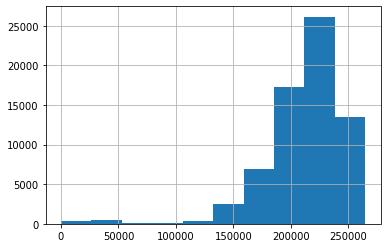

overall


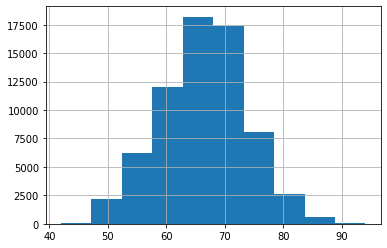

potential


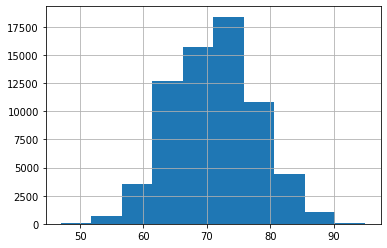

value_eur


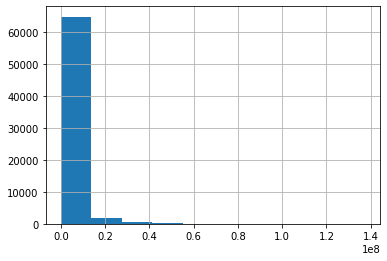

wage_eur


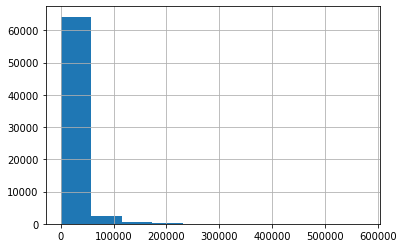

age


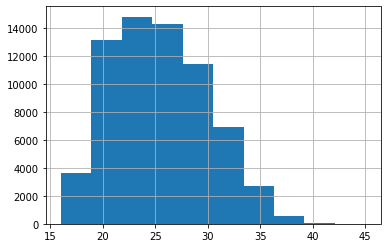

height_cm


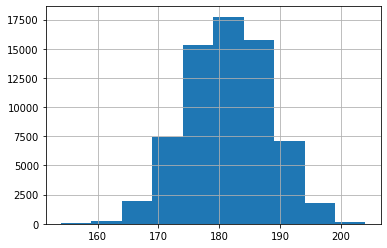

weight_kg


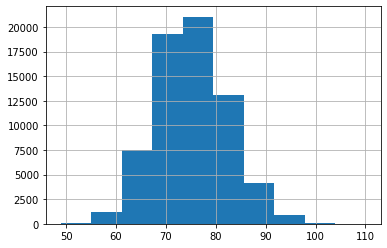

club_team_id


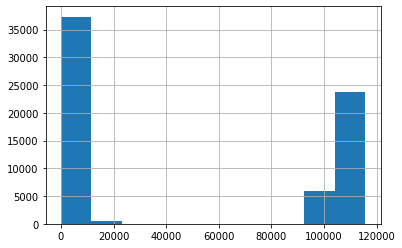

league_level


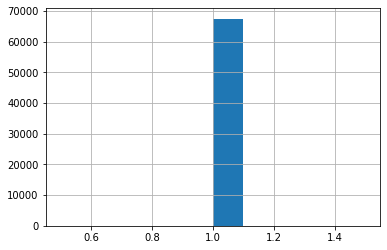

club_contract_valid_until


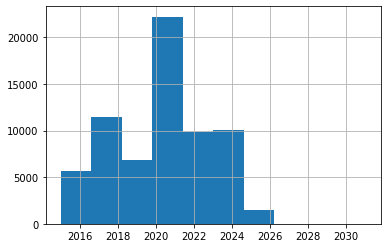

nationality_id


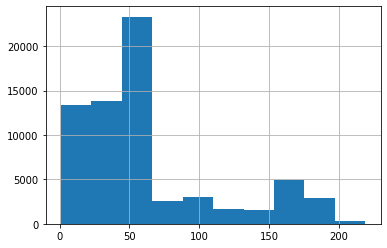

weak_foot


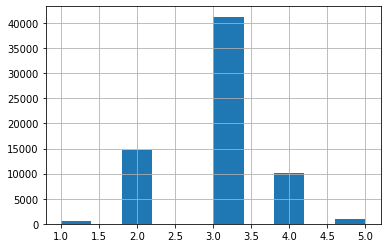

skill_moves


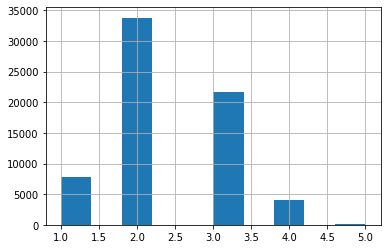

international_reputation


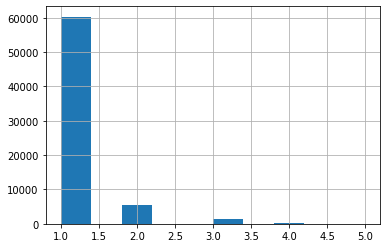

attacking_crossing


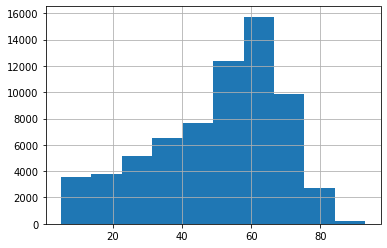

attacking_finishing


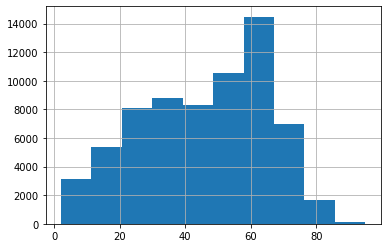

attacking_heading_accuracy


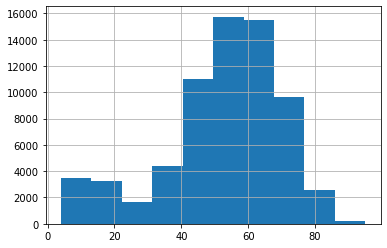

attacking_short_passing


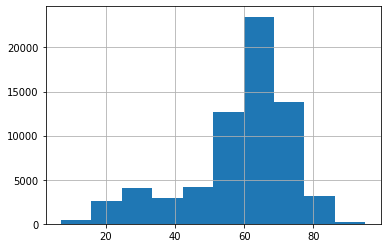

attacking_volleys


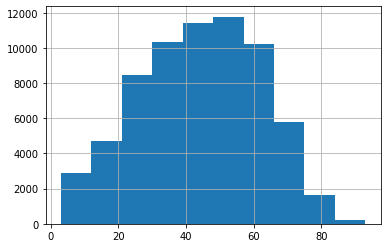

skill_dribbling


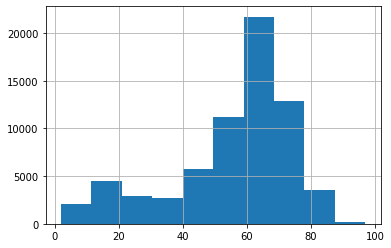

skill_curve


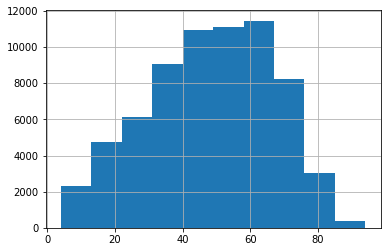

skill_fk_accuracy


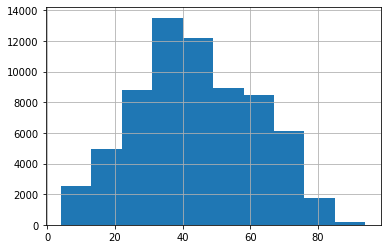

skill_long_passing


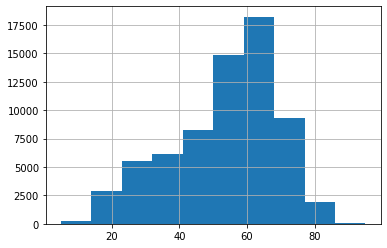

skill_ball_control


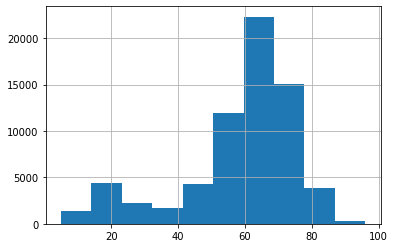

movement_acceleration


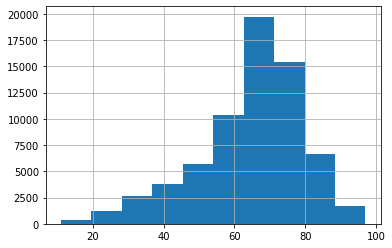

movement_sprint_speed


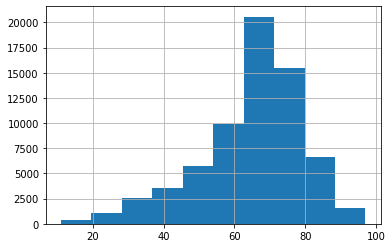

movement_agility


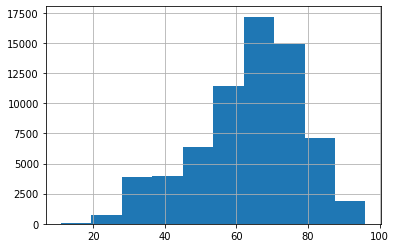

movement_reactions


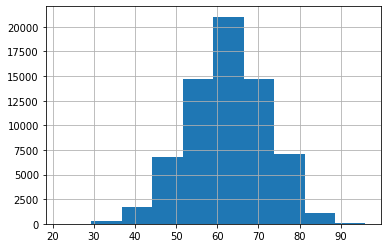

movement_balance


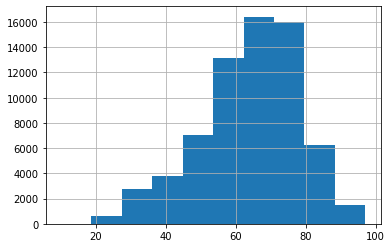

power_shot_power


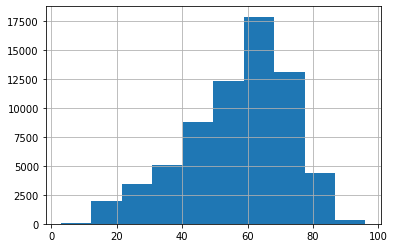

power_jumping


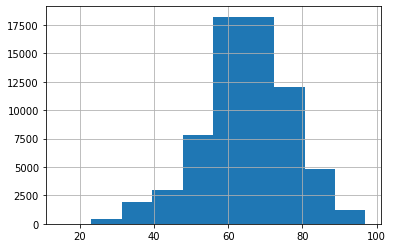

power_stamina


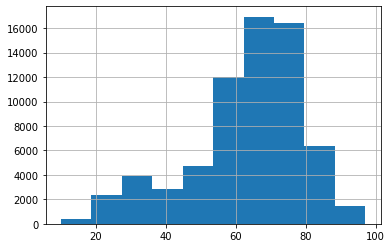

power_strength


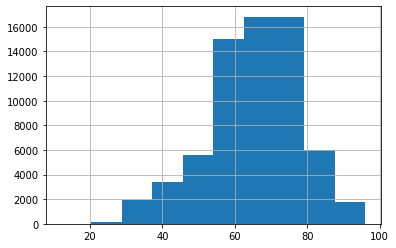

power_long_shots


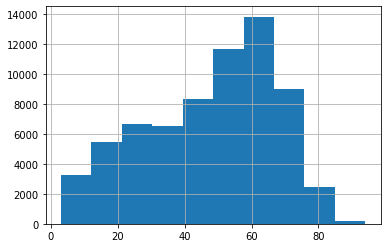

mentality_aggression


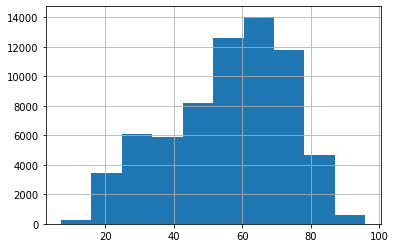

mentality_interceptions


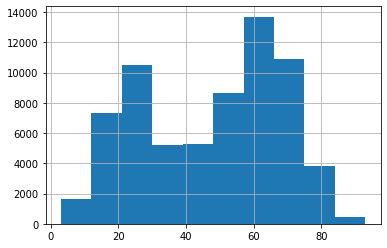

mentality_positioning


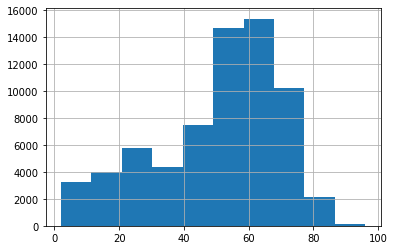

mentality_vision


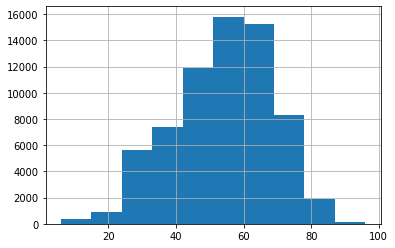

mentality_penalties


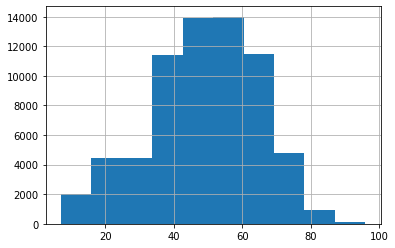

defending_marking_awareness


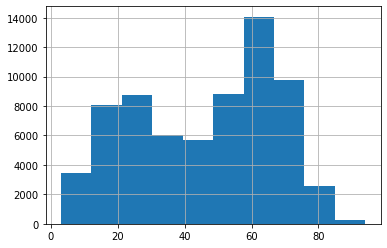

defending_standing_tackle


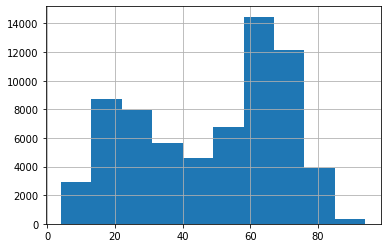

defending_sliding_tackle


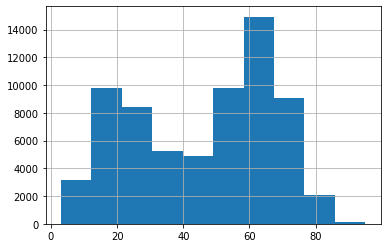

goalkeeping_diving


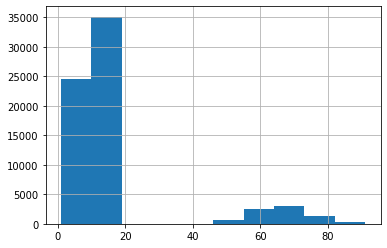

goalkeeping_handling


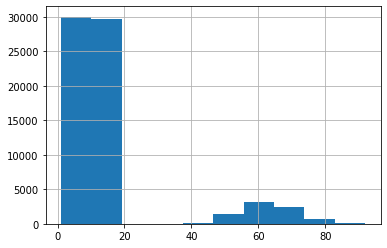

goalkeeping_kicking


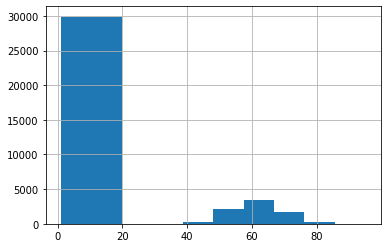

goalkeeping_positioning


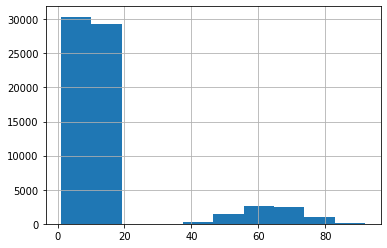

goalkeeping_reflexes


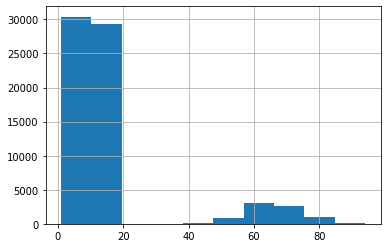

year


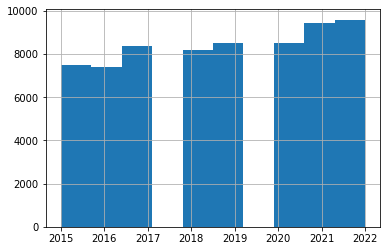

In [43]:
#histograms of numeric columns
for col in numcols:
    print(col)
    train[col].hist()
    plt.show()

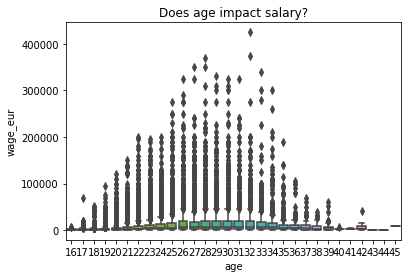

In [44]:
sns.boxplot(cb_df.age, cb_df.wage_eur)
plt.title("Does age impact salary?")
rcParams['figure.figsize'] = 12, 5
plt.show()

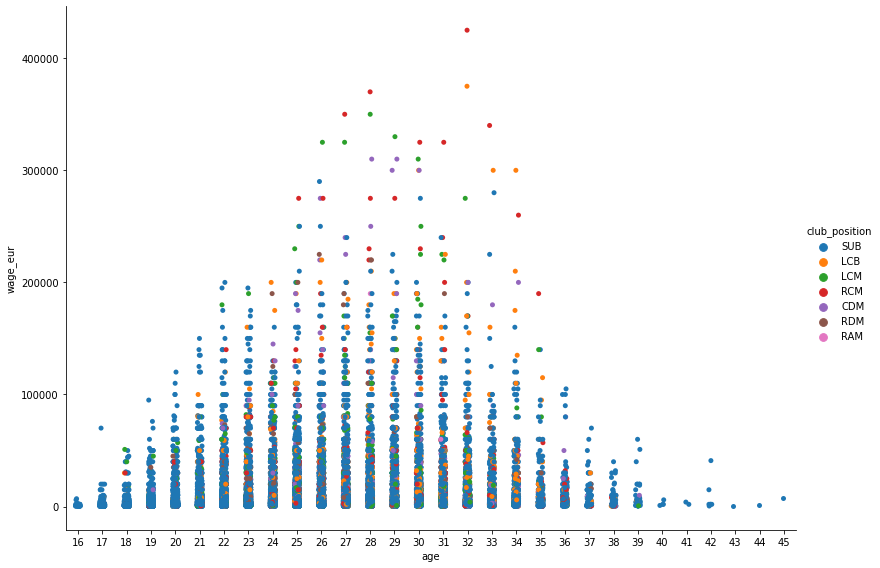

In [45]:
sns.catplot(data=cb_df, x='age', y='wage_eur', 
    hue='club_position', height=8, aspect=11.7/8.27)

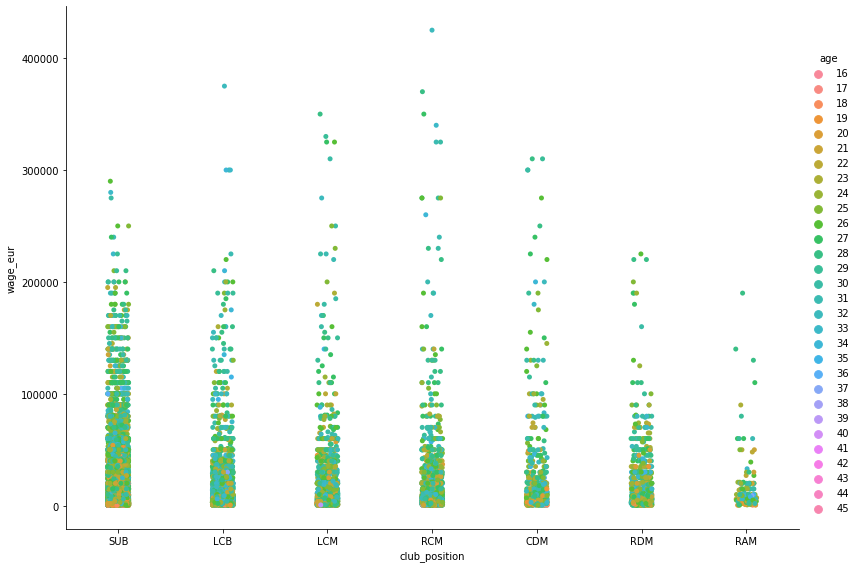

In [46]:
sns.catplot(data=cb_df, x='club_position', y='wage_eur', 
    hue='age', height=8, aspect=11.7/8.27)

# would recommend adding age group for exploration

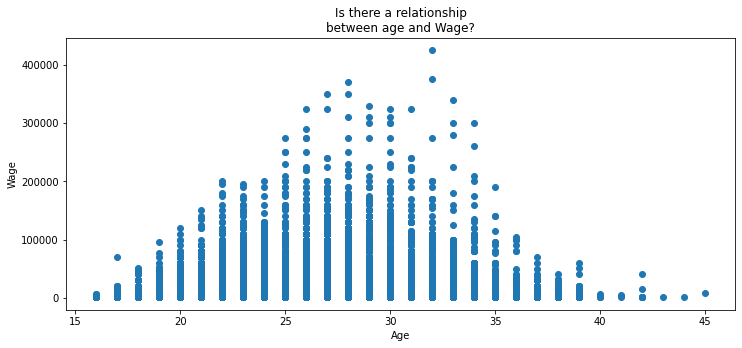

In [47]:
# plot age by salary
plt.scatter(cb_df.age, cb_df.wage_eur)
plt.xlabel("Age")
plt.ylabel("Wage")
plt.title("Is there a relationship\nbetween age and Wage?")
plt.show()

In [48]:
# calculates the mean age by position
cb_mean = cb_df.groupby('club_position').age.mean() 

In [49]:
cb_mean.head().T

club_position
CDM    27.091993
LCB    27.329354
LCM    26.568776
RAM    26.325203
RCM    26.490734
Name: age, dtype: float64

In [50]:
#cb_df.groupby('club_position').age.transform('mean')

In [51]:
# adds the mean age for that club position
cb_df['cb_mean'] = cb_df.groupby('club_position').age.transform('mean')
cb_df.head().T

,114222,102434,94178,75884,122881
sofifa_id,189207,189295,197231,207439,199535
short_name,J. Durmaz,J. Sudić,K. Babacar,L. Paredes,M. Novak
player_positions,"LM, RM",CB,ST,"CDM, CM",LB
overall,70,65,76,77,59
potential,73,68,81,84,65
value_eur,1600000.0,550000.0,7000000.0,10500000.0,180000.0
wage_eur,35000.0,2000.0,60000.0,50000.0,3000.0
age,26,25,23,23,24
height_cm,180,193,185,180,183
weight_kg,70,87,76,75,77


In [52]:
# aggregates totals fore each club position
df.groupby("club_position").agg(["min", "mean", "median", "std", "max"])

sofifa_id                                                overall                                 potential                                 value_eur                                                     wage_eur                                                age                                 height_cm                                   weight_kg                                  club_team_id                                                 league_level                       club_contract_valid_until                                        nationality_id                                   weak_foot                                skill_moves                                international_reputation                                attacking_crossing                                  attacking_finishing                                  attacking_heading_accuracy                                  attacking_short_passing                                  attacking_volleys             \
                    min           mean    median           std     max     min       mean median       std max       min       mean median       std max       min          mean     median           std          max      min          mean   median           std       max min       mean median       std max       min        mean median       std  max       min       mean median       std  max          min          mean    median           std       max          min mean median  std  max                       min         mean  median       std     max            min       mean median        std  max       min      mean median       std max         min      mean median       std max                      min      mean median       std max                min       mean median        std max                 min       mean median        std max                        min       mean median        std max                     min       mean median        std max               min       mean   
club_position                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
CAM                  41  200045.625573  204700.0  36296.721002  263049      49  71.125000   71.0  6.253525  93        55  73.831422   74.0  6.258462  94   30000.0  5.560152e+06  2100000.0  1.005353e+07  107500000.0    500.0  21020.498853  10000.0  33927.136326  560000.0  17  26.823394   27.0  4.237201  39       155  177.025229  177.0  6.130017  196        50  72.048165   72.0  6.016613   96          1.0  51135.263188    1911.0  54161.485551  115530.0          1.0  1.0    1.0  0.0  1.0                    2015.0  2019.980505  2020.0  2.466452  2026.0              1  56.787271   51.0  43.700003  219         1  3.329128    3.0  0.702867   5           2  3.197821    3.0  0.658042   5                        1  1.284977    1.0  0.616919   5                 26  65.609518   66.0   9.732718  90                  30  64.693234   65.0   8.636102  95                         25  53.657110   54.0  11.134626  90                      35  71.879587   72.0   7.065171  92                17  61.094037   
CB                1078

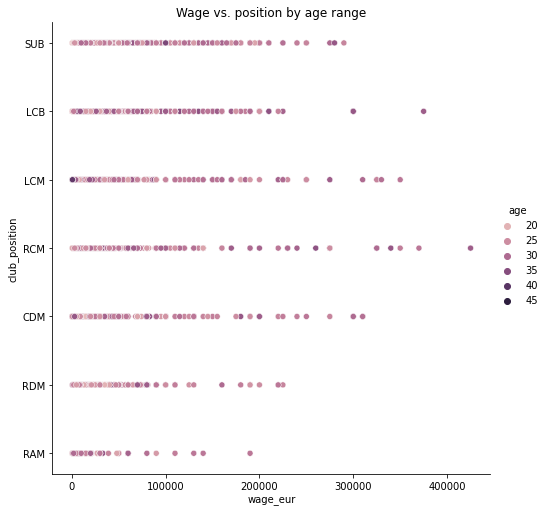

In [53]:
sns.relplot(data=cb_df, x="wage_eur", y="club_position", hue='age', 
            height=7, aspect=1).set(title="Wage vs. position by age range")

In [54]:
#values = ['Russia', 'Italian', 'US']
#conditions = list(map(cb_df['league_name'].str.contains, values))

#cb_df['country_name'] = np.select(conditions, values, 'other')

In [55]:
#cb_df.head().T

In [56]:
test_results = stats.pearsonr(cb_df.wage_eur, cb_df.age)
test_results


(0.16151177196024213, 1.8548644411914727e-208)

In [57]:
r, p = test_results

print(f'p is {p:.10f}')

p is 0.0000000000


# H0: The average wage for players is no different than the population mean.

In [58]:
#players_total_salary = cb_df[cb_df.age.mean()].wage_eur
cb_mean_salary = cb_df.cb_mean
overall_total_wage_mean = cb_df.wage_eur.mean()

test_results = stats.ttest_1samp(cb_mean, overall_total_wage_mean)
test_results


Ttest_1sampResult(statistic=-43432.22043410824, pvalue=1.0056146047744616e-26)

In [59]:
rcm_total = cb_df[cb_df.club_position == 'RCM'].wage_eur
overall_total_rcm_mean = cb_df.wage_eur.mean()

test_results1 = stats.ttest_1samp(rcm_total, overall_total_rcm_mean)
test_results1


Ttest_1sampResult(statistic=6.155060111771081, pvalue=9.68427403246956e-10)

In [60]:
#'RCM', 'RAM', 'CDM', 'LCB', 'RDM', 'LCM', 'SUB'
ram_total = cb_df[cb_df.club_position == 'RAM'].wage_eur
overall_total_ram_mean = cb_df.wage_eur.mean()

test_results2 = stats.ttest_1samp(ram_total, overall_total_ram_mean)
test_results2


Ttest_1sampResult(statistic=2.366771239778561, pvalue=0.019518015889740226)

In [61]:
#'RCM', 'RAM', 'CDM', 'LCB', 'RDM', 'LCM', 'SUB'
cdm_total = cb_df[cb_df.club_position == 'CDM'].wage_eur
overall_total_cdm_mean = cb_df.wage_eur.mean()

test_results3 = stats.ttest_1samp(cdm_total, overall_total_cdm_mean)
test_results3


Ttest_1sampResult(statistic=6.492515423344939, pvalue=1.8012721887318888e-10)

# # Does seniority(length of time playing with a club) impact salary?

In [62]:
#train_scaled.head().T

In [63]:
#train.head().T

In [64]:
cb_df_pca = cb_df.drop(columns = catcols)

In [65]:
# Standardize data using PCA
pca = PCA()
pca.fit(cb_df_pca)

PCA()

In [66]:
pca.explained_variance_ratio_

array([9.99870232e-01, 8.74386100e-05, 3.66220181e-05, 5.70702748e-06,
       1.39191168e-10, 7.29498135e-11, 5.47209367e-11, 1.32029306e-11,
       1.17194859e-11, 7.01557647e-12, 3.60131372e-12, 3.24657436e-12,
       2.55468867e-12, 2.46337428e-12, 2.32464362e-12, 2.17145104e-12,
       1.91055394e-12, 1.60613900e-12, 1.45222401e-12, 1.39381315e-12,
       1.36715175e-12, 1.30986613e-12, 1.18211360e-12, 1.14617982e-12,
       1.07558759e-12, 1.02064890e-12, 1.00896430e-12, 9.39151868e-13,
       8.46827065e-13, 7.72513850e-13, 6.06867115e-13, 5.33238326e-13,
       5.27270360e-13, 4.79368555e-13, 3.44513049e-13, 3.31006685e-13,
       3.18464390e-13, 3.11972962e-13, 2.85157484e-13, 2.80140586e-13,
       2.65841592e-13, 2.57429709e-13, 1.65560450e-13, 5.38595442e-14,
       3.62122147e-14, 1.40492101e-14, 1.12171684e-14, 5.34110606e-15,
       2.25928205e-15, 9.89054686e-33])

Text(0, 0.5, 'Cumulative Explained Variance')

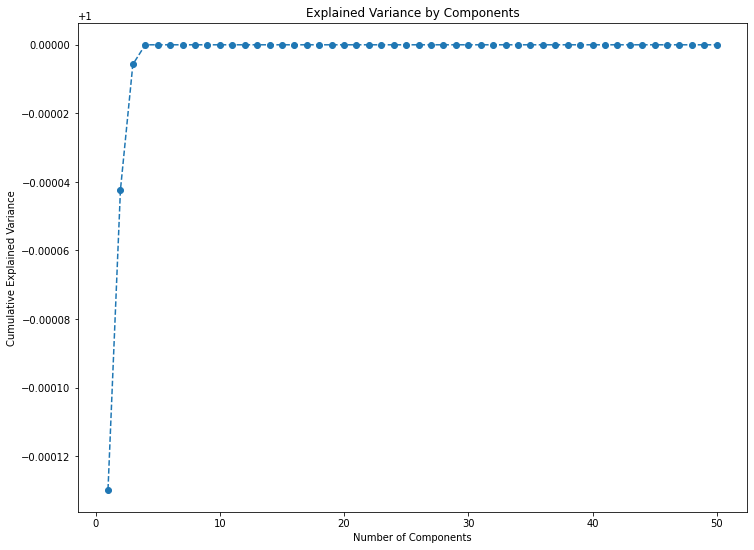

In [67]:
plt.figure(figsize = (12,9))
plt.plot(range(1,51), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

